# 안녕하세요^^ 
## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

In [ ]:
# 필요 라이브러리부터 설치합니다.
# %pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 '에이블러용' 폴더에 있습니다.

[기본 데이터]
* seoul_moving_month_202401.csv

[데이터 소개]
* 서울 시 구별 이동 2024년 1월 데이터
* https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_202401.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 'seoul_moving_month_202401.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [37]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

import pandas as pd
seoul_moving = pd.read_csv('../미니프로젝트 1차_실습파일/1.2 seoul_moving_month_202401.csv',sep=",", encoding = 'UTF-8')

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(29361031, 10)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# describe()
seoul_moving.describe().T


,count,mean,std,min,25%,50%,75%,max
대상연월,29361031.0,202401.000000,0.000000,202401.0,202401.0,202401.0,202401.0,202401.0
도착시간,29361031.0,13.621945,5.835017,0.0,10.0,14.0,18.0,23.0
출발 시군구 코드,29361031.0,17105.376242,9024.981434,11010.0,11100.0,11200.0,31014.0,39000.0
도착 시군구 코드,29361031.0,17181.227121,9037.102181,11010.0,11110.0,11200.0,31014.0,39000.0
나이,29361031.0,42.859793,17.994559,0.0,30.0,40.0,55.0,80.0
평균 이동 시간(분),29361031.0,93.666260,78.033161,1.0,49.0,74.0,112.0,4462.0


In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# info()
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361031 entries, 0 to 29361030
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.2+ GB


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# head()
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90


* 1번 행의 의미
    * " 2024년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 E(기타)로 이동한 10 ~ 15세 여성은 총 11.96명이며 이들의 평균 이동시간은 167분이다


#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '이동인구(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)
    - 3명 미만의 이동인구는 * 처리 되어 있어서 해당 값을 나름의 기준으로 변경하세요.(중위값)
    - '이동인구(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# value_counts()
seoul_moving['이동인구(합)'].value_counts()

이동인구(합)
*          3870174
6.05        420734
3.30        397265
3.29        286071
3.31        234821
            ...   
1617.95          1
2414.11          1
1499.98          1
1478.45          1
689.93           1
Name: count, Length: 140404, dtype: int64

In [38]:
# '*' 값의 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체 (1.5명)

seoul_moving['이동인구(합)'].replace('*', '1.5', inplace = True)

In [39]:
seoul_moving['이동인구(합)'].value_counts()

이동인구(합)
1.5        3870174
6.05        420734
3.30        397265
3.29        286071
3.31        234821
            ...   
1617.95          1
2414.11          1
1499.98          1
1478.45          1
689.93           1
Name: count, Length: 140404, dtype: int64

In [40]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
# astype()
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].astype('float')
seoul_moving['이동인구(합)']

0           28.06
1           11.96
2           17.63
3            5.96
4            5.90
            ...  
29361026     1.50
29361027     1.50
29361028     9.47
29361029     3.28
29361030     6.56
Name: 이동인구(합), Length: 29361031, dtype: float64

In [5]:
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361031 entries, 0 to 29361030
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.2+ GB


#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 이동유형, value_counts()
seoul_moving['이동유형'].value_counts()

이동유형
EH    5947038
HE    5585412
EE    5224553
WH    3078348
WE    2759477
HW    2700535
EW    2330931
WW    1082641
HH     652096
Name: count, dtype: int64

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 요일, value_counts()
seoul_moving['요일'].value_counts()

요일
월    4448237
수    4341429
화    4300070
토    4254525
금    4251430
목    4005959
일    3759381
Name: count, dtype: int64

* 24년 1월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 5, 화 : 5, 수 : 5, 목 : 4, 금 : 4, 토 : 4

In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 성별, value_counts()
seoul_moving['성별'].value_counts()

성별
M    16433525
F    12927506
Name: count, dtype: int64

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [41]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 새벽 5시까지(0~5시) 도착하는 이동 사례, seoul_moving_night 변수 저장

seoul_moving_night = seoul_moving.loc[seoul_moving['도착시간'] < 5]
seoul_moving_night['요일'].value_counts()

요일
토    378112
월    362697
수    337301
일    335062
화    327124
금    326755
목    310690
Name: count, dtype: int64

#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다.
* 시군구 코드:광역시도(2자리)+시군구(3자리) / 서울:11, 부산:26, 대구:27, 인천:28, 광주:29, 대전:30, 울산:31)

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 출발 시군구 코드, 도착 시군구 코드 <20000
only_seoul_moving = seoul_moving.loc[(seoul_moving['출발 시군구 코드'] < 20000) & (seoul_moving['도착 시군구 코드'] < 20000)]

#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [10]:
only_seoul_moving_same = only_seoul_moving.loc[only_seoul_moving['출발 시군구 코드'] == only_seoul_moving['도착 시군구 코드']]
only_seoul_moving_diff = only_seoul_moving.loc[only_seoul_moving['출발 시군구 코드'] != only_seoul_moving['도착 시군구 코드']]

In [13]:
only_seoul_moving_same.groupby(by = ['출발 시군구 코드'], as_index = False)['이동인구(합)'].sum().sort_values('이동인구(합)', ascending = False)

,출발 시군구 코드,이동인구(합)
22,11230,26760158.25
23,11240,24205593.00
24,11250,16040134.23
21,11220,15511316.00
15,11160,15460399.71
18,11190,13394648.65
13,11140,12774575.69
10,11110,12766997.92
11,11120,11225057.95
20,11210,10506878.75


In [14]:
only_seoul_moving_diff.groupby(by = ['출발 시군구 코드'], as_index = False)['이동인구(합)'].sum().sort_values('이동인구(합)', ascending = False)

,출발 시군구 코드,이동인구(합)
22,11230,23297651.03
21,11220,16529995.81
1,11020,14049403.00
18,11190,13959033.76
23,11240,13349555.90
0,11010,13166566.24
13,11140,12434580.70
12,11130,10142335.06
3,11040,10029348.23
20,11210,9702677.69


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 유출이 제일 많은 구와 적은 구는?
only_seoul_moving.groupby(by = ['출발 시군구 코드'], as_index = False)['이동인구(합)'].sum().sort_values('이동인구(합)', ascending = False)

,출발 시군구 코드,이동인구(합)
22,11230,50057809.28
23,11240,37555148.90
21,11220,32041311.81
18,11190,27353682.41
13,11140,25209156.39
15,11160,24528710.98
24,11250,23422805.26
1,11020,21663423.16
10,11110,21174815.72
0,11010,20381157.61


In [15]:
only_seoul_moving_same.groupby(by = ['도착 시군구 코드'], as_index = False)['이동인구(합)'].sum().sort_values('이동인구(합)', ascending = False)

,도착 시군구 코드,이동인구(합)
22,11230,26760158.25
23,11240,24205593.00
24,11250,16040134.23
21,11220,15511316.00
15,11160,15460399.71
18,11190,13394648.65
13,11140,12774575.69
10,11110,12766997.92
11,11120,11225057.95
20,11210,10506878.75


In [16]:
only_seoul_moving_diff.groupby(by = ['도착 시군구 코드'], as_index = False)['이동인구(합)'].sum().sort_values('이동인구(합)', ascending = False)

,도착 시군구 코드,이동인구(합)
22,11230,23271626.11
21,11220,16603565.69
1,11020,14078685.33
18,11190,13924518.07
23,11240,13260464.70
0,11010,13044236.09
13,11140,12421435.35
12,11130,10066395.98
3,11040,9989631.62
20,11210,9700845.24


In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 유입이 제일 많은 구와 적은 구는?
only_seoul_moving.groupby(by = ['도착 시군구 코드'], as_index = False)['이동인구(합)'].sum().sort_values('이동인구(합)', ascending = False)

,도착 시군구 코드,이동인구(합)
22,11230,50031784.36
23,11240,37466057.70
21,11220,32114881.69
18,11190,27319166.72
13,11140,25196011.04
15,11160,24764699.10
24,11250,23386329.60
1,11020,21692705.49
10,11110,21162862.01
0,11010,20258827.46


- 강남구: 유출, 유입이 가장 많다
- 금천구: 유출, 유입이 가장 적다
- 출발 == 도착 지역구, 출발 != 도착 지역구 에서도 위와 같았다

#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [51]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# '도착시간' >=5
seoul_moving_not_night = only_seoul_moving.loc[seoul_moving['도착시간'] >= 5]
seoul_moving_not_night

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
2377741,202401,일,5,11010,11010,F,0,HE,54,28.28
2377742,202401,일,5,11010,11010,F,0,HW,30,28.03
2377743,202401,일,5,11010,11010,F,10,EE,54,6.00
2377744,202401,일,5,11010,11010,F,10,HE,13,5.82
2377745,202401,일,5,11010,11010,F,15,EH,44,12.22
...,...,...,...,...,...,...,...,...,...,...
29320192,202401,토,23,11250,11250,M,80,EH,18,28.41
29320193,202401,토,23,11250,11250,M,80,HE,78,9.46
29320194,202401,토,23,11250,11250,M,80,HW,168,9.48
29320195,202401,토,23,11250,11250,M,80,WH,16,47.27


[실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

- 출발 == 도착 데이터프레임 생성

In [18]:
df_mean1 = only_seoul_moving_same.groupby(by = ['도착 시군구 코드'], as_index = False)[['평균 이동 시간(분)' , '이동인구(합)']].mean()
df_sum1 = only_seoul_moving_same.groupby(by = ['도착 시군구 코드'], as_index = False)[['평균 이동 시간(분)' , '이동인구(합)']].sum()
df_sum1.rename(columns = {'평균 이동 시간(분)' : '총 이동 시간', '이동인구(합)' : '총 이동인구'}, inplace = True)

temp1 = pd.merge(df_mean1, df_sum1)
temp1.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,39.143732,172.655707,1635660,7214591.37
1,11020,35.521909,182.915009,1478635,7614020.16
2,11030,38.014738,153.496897,1643111,6634596.40
3,11040,37.521522,182.948571,1657138,8079923.65
4,11050,37.998819,220.726352,1704741,9902446.34


- 출발 != 도착 데이터 프레임

In [19]:
df_mean2 = only_seoul_moving_diff.groupby(by = ['도착 시군구 코드'], as_index = False)[['평균 이동 시간(분)' , '이동인구(합)']].mean()
df_sum2 = only_seoul_moving_diff.groupby(by = ['도착 시군구 코드'], as_index = False)[['평균 이동 시간(분)' , '이동인구(합)']].sum()
df_sum2.rename(columns = {'평균 이동 시간(분)' : '총 이동 시간', '이동인구(합)' : '총 이동인구'}, inplace = True)

temp2 = pd.merge(df_mean2, df_sum2)
temp2.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,62.139184,29.539381,27439918,13044236.09
1,11020,60.571679,31.288957,27254651,14078685.33
2,11030,60.655937,21.661248,24844126,8872252.28
3,11040,61.130378,23.833526,25622309,9989631.62
4,11050,64.554219,22.156406,25100165,8614920.33


- 합쳐진 데이터 프레임

In [20]:
df_mean = only_seoul_moving.groupby(by = ['도착 시군구 코드'], as_index = False)[['평균 이동 시간(분)' , '이동인구(합)']].mean()
df_sum = only_seoul_moving.groupby(by = ['도착 시군구 코드'], as_index = False)[['평균 이동 시간(분)' , '이동인구(합)']].sum()
df_sum.rename(columns = {'평균 이동 시간(분)' : '총 이동 시간', '이동인구(합)' : '총 이동인구'}, inplace = True)

temp = pd.merge(df_mean, df_sum)
temp.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,60.151307,41.911289,29075578,20258827.46
1,11020,58.450528,44.128266,28733286,21692705.49
2,11030,58.494740,34.245515,26487237,15506848.68
3,11040,58.879851,39.001257,27279447,18069555.27
4,11050,61.807174,42.697635,26804906,18517366.67


In [21]:
# 해당 데이터프레임을 csv 파일로 저장하세요
# to_csv()
temp.to_csv("../미니프로젝트 1차_실습파일/seoul_moving_info.csv", index=False)
temp1.to_csv("../미니프로젝트 1차_실습파일/seoul_moving_same_info.csv", index=False)
temp2.to_csv("../미니프로젝트 1차_실습파일/seoul_moving_diff_info.csv", index=False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [22]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [23]:
seoul_moving_info = pd.read_csv('../미니프로젝트 1차_실습파일/seoul_moving_info.csv')
seoul_moving_same_info = pd.read_csv('../미니프로젝트 1차_실습파일/seoul_moving_same_info.csv')
seoul_moving_diff_info = pd.read_csv('../미니프로젝트 1차_실습파일/seoul_moving_diff_info.csv')

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [24]:
seoul_moving_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   도착 시군구 코드    25 non-null     int64  
 1   평균 이동 시간(분)  25 non-null     float64
 2   이동인구(합)      25 non-null     float64
 3   총 이동 시간      25 non-null     int64  
 4   총 이동인구       25 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.1 KB


In [29]:
seoul_moving_info['도착 시군구 코드'] = seoul_moving_info['도착 시군구 코드'].map({
    11010: '종로구',
    11020: '중구',
    11030: '용산구',
    11040: '성동구',
    11050: '광진구',
    11060: '동대문구',
    11070: '중랑구',
    11080: '성북구',
    11090: '강북구',
    11100: '도봉구',
    11110: '노원구',
    11120: '은평구',
    11130: '서대문구',
    11140: '마포구',
    11150: '양천구',
    11160: '강서구',
    11170: '구로구',
    11180: '금천구',
    11190: '영등포구',
    11200: '동작구',
    11210: '관악구',
    11220: '서초구',
    11230: '강남구',
    11240: '송파구',
    11250: '강동구'
})

seoul_moving_info = seoul_moving_info.rename(columns={'도착 시군구 코드': '자치구'})

In [33]:
seoul_moving_same_info['도착 시군구 코드'] = seoul_moving_same_info['도착 시군구 코드'].map({
    11010: '종로구',
    11020: '중구',
    11030: '용산구',
    11040: '성동구',
    11050: '광진구',
    11060: '동대문구',
    11070: '중랑구',
    11080: '성북구',
    11090: '강북구',
    11100: '도봉구',
    11110: '노원구',
    11120: '은평구',
    11130: '서대문구',
    11140: '마포구',
    11150: '양천구',
    11160: '강서구',
    11170: '구로구',
    11180: '금천구',
    11190: '영등포구',
    11200: '동작구',
    11210: '관악구',
    11220: '서초구',
    11230: '강남구',
    11240: '송파구',
    11250: '강동구'
})

seoul_moving_same_info = seoul_moving_same_info.rename(columns={'도착 시군구 코드': '자치구'})

In [34]:
seoul_moving_diff_info['도착 시군구 코드'] = seoul_moving_diff_info['도착 시군구 코드'].map({
    11010: '종로구',
    11020: '중구',
    11030: '용산구',
    11040: '성동구',
    11050: '광진구',
    11060: '동대문구',
    11070: '중랑구',
    11080: '성북구',
    11090: '강북구',
    11100: '도봉구',
    11110: '노원구',
    11120: '은평구',
    11130: '서대문구',
    11140: '마포구',
    11150: '양천구',
    11160: '강서구',
    11170: '구로구',
    11180: '금천구',
    11190: '영등포구',
    11200: '동작구',
    11210: '관악구',
    11220: '서초구',
    11230: '강남구',
    11240: '송파구',
    11250: '강동구'
})

seoul_moving_diff_info = seoul_moving_diff_info.rename(columns={'도착 시군구 코드': '자치구'})

In [27]:
def eda_cat_num(feature, targets, data):
    plt.figure(figsize = (15, 15))
    for i in range(len(targets)):
        plt.subplot(2, 2, i+1)
        sns.barplot(x = feature, y = targets[i], data = data)
        plt.xticks(rotation = 45)
    plt.tight_layout()    
    plt.show()
    
    for i in range(len(targets)):
        head5 = list(data.loc[:, [feature, targets[i]]].sort_values(targets[i], ascending = False)[feature].head(5))
        tail5 = list(data.loc[:, [feature, targets[i]]].sort_values(targets[i], ascending = False)[feature].tail(5))

        print(f'{targets[i]} 상위 5개 지역: {head5}')
        print(f'{targets[i]} 하위 5개 지역: {tail5}')

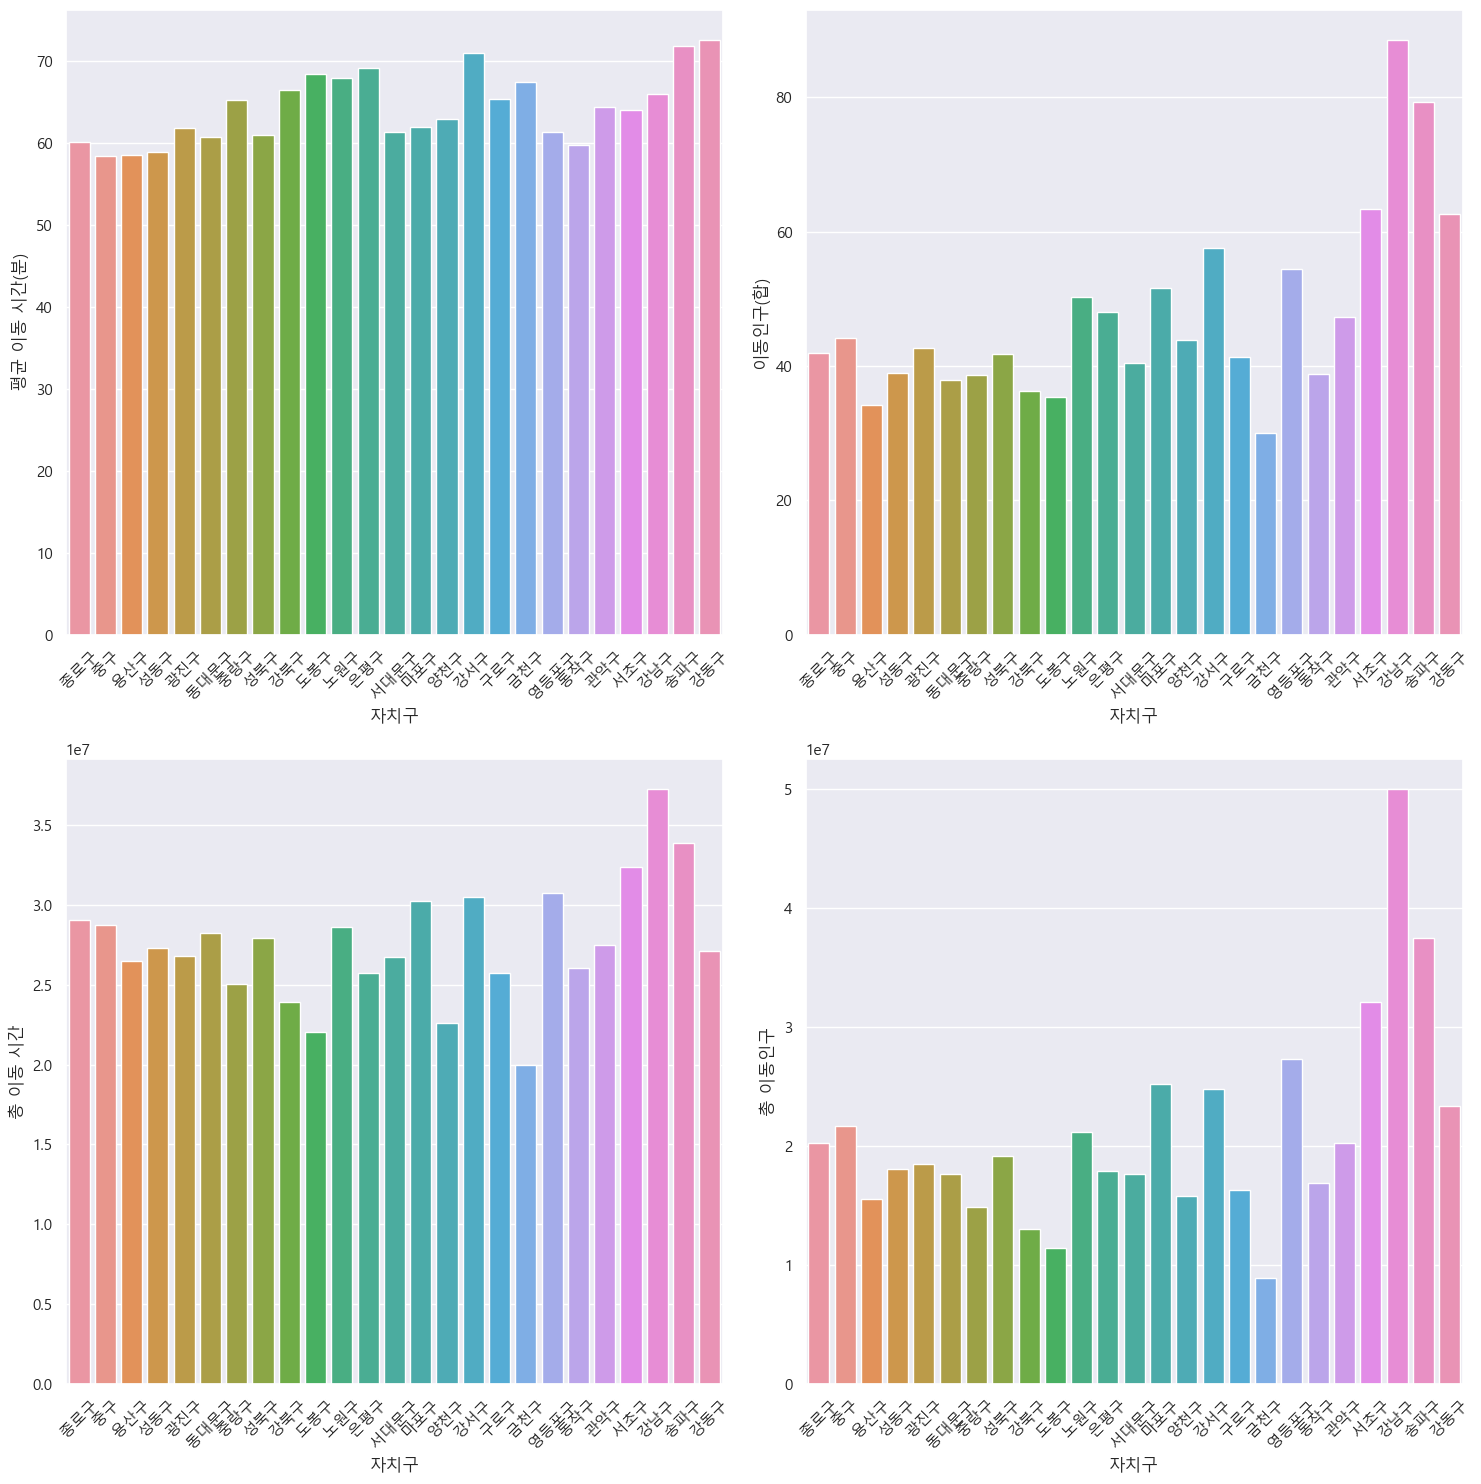

평균 이동 시간(분) 상위 5개 지역: ['강동구', '송파구', '강서구', '은평구', '도봉구']
평균 이동 시간(분) 하위 5개 지역: ['종로구', '동작구', '성동구', '용산구', '중구']
이동인구(합) 상위 5개 지역: ['강남구', '송파구', '서초구', '강동구', '강서구']
이동인구(합) 하위 5개 지역: ['동대문구', '강북구', '도봉구', '용산구', '금천구']
총 이동 시간 상위 5개 지역: ['강남구', '송파구', '서초구', '영등포구', '강서구']
총 이동 시간 하위 5개 지역: ['중랑구', '강북구', '양천구', '도봉구', '금천구']
총 이동인구 상위 5개 지역: ['강남구', '송파구', '서초구', '영등포구', '마포구']
총 이동인구 하위 5개 지역: ['용산구', '중랑구', '강북구', '도봉구', '금천구']


In [30]:
feature, targets = '자치구', list(seoul_moving_info)[1:]

eda_cat_num(feature, targets, seoul_moving_info)

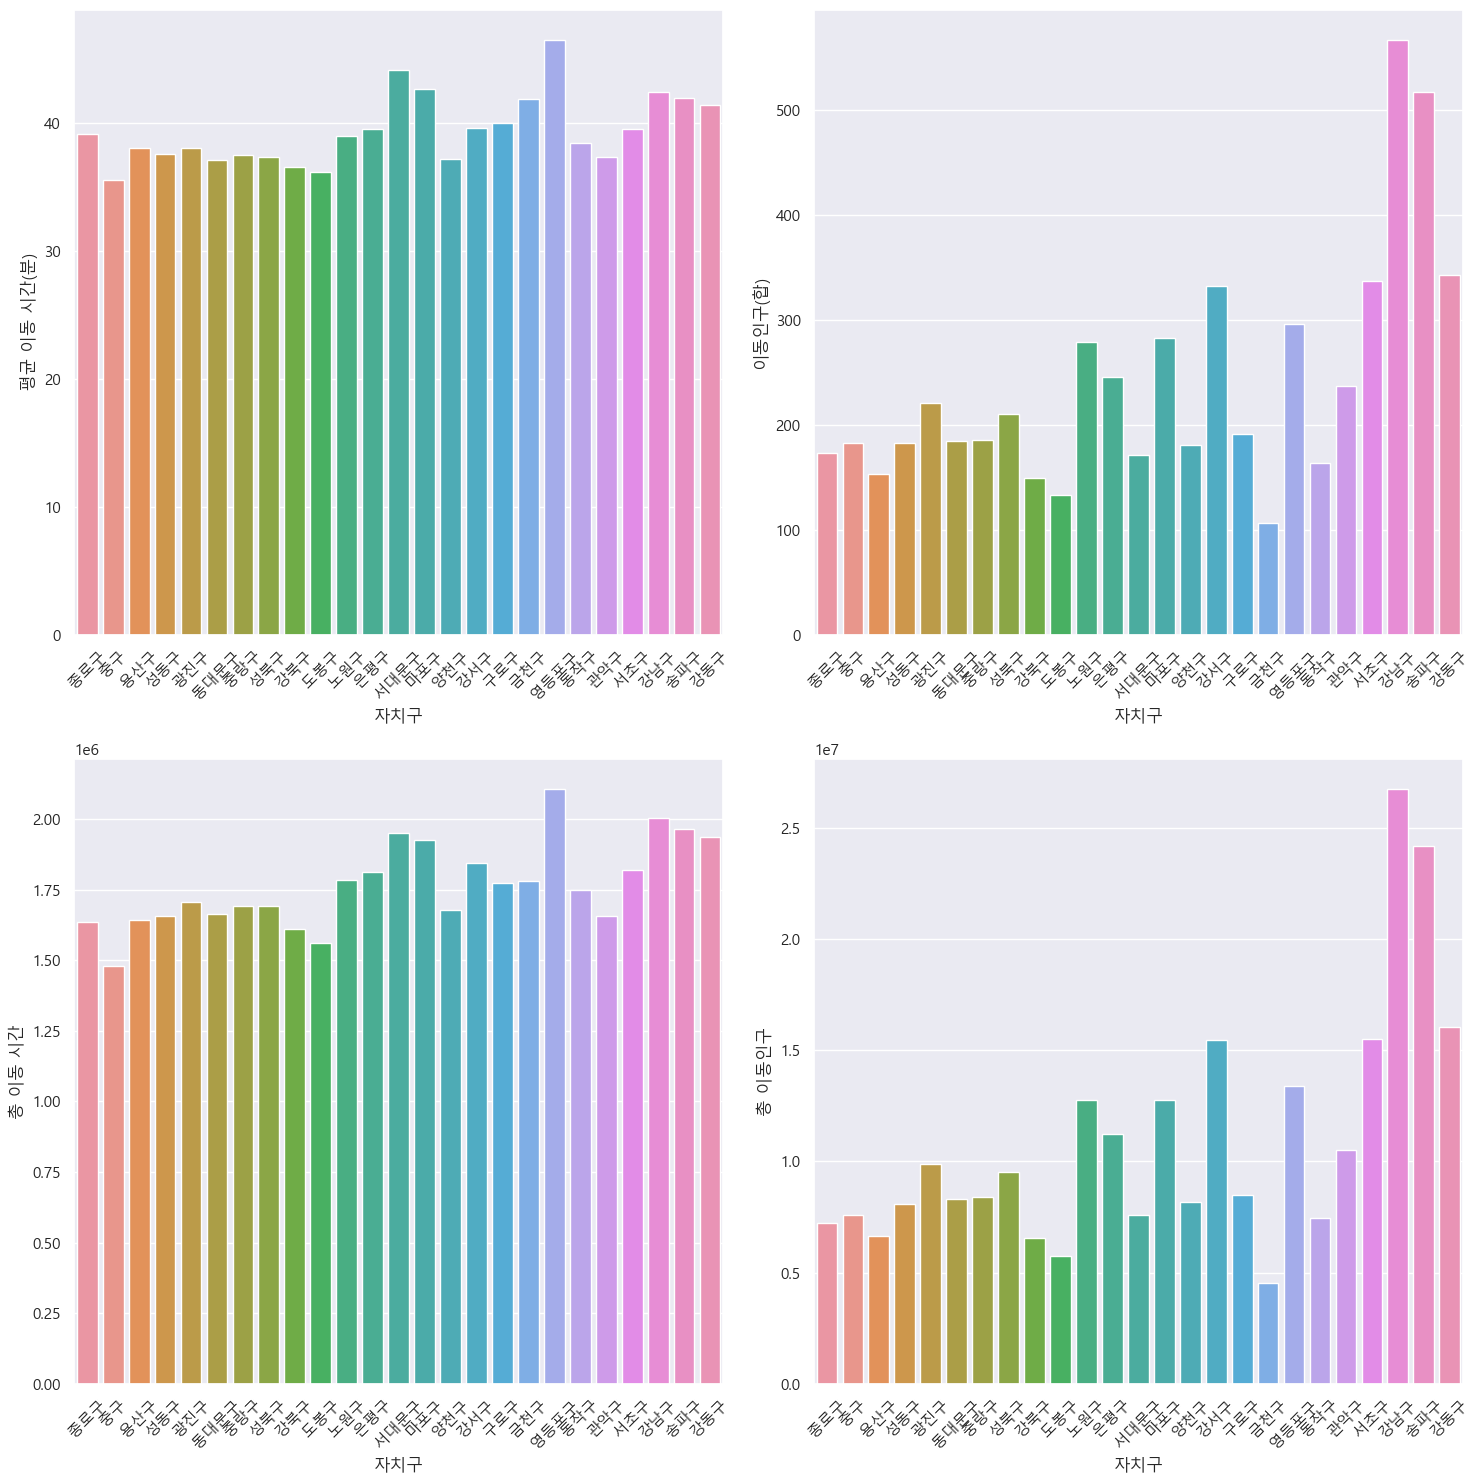

평균 이동 시간(분) 상위 5개 지역: ['영등포구', '서대문구', '마포구', '강남구', '송파구']
평균 이동 시간(분) 하위 5개 지역: ['양천구', '동대문구', '강북구', '도봉구', '중구']
이동인구(합) 상위 5개 지역: ['강남구', '송파구', '강동구', '서초구', '강서구']
이동인구(합) 하위 5개 지역: ['동작구', '용산구', '강북구', '도봉구', '금천구']
총 이동 시간 상위 5개 지역: ['영등포구', '강남구', '송파구', '서대문구', '강동구']
총 이동 시간 하위 5개 지역: ['용산구', '종로구', '강북구', '도봉구', '중구']
총 이동인구 상위 5개 지역: ['강남구', '송파구', '강동구', '서초구', '강서구']
총 이동인구 하위 5개 지역: ['종로구', '용산구', '강북구', '도봉구', '금천구']


In [35]:
feature, targets = '자치구', list(seoul_moving_info)[1:]

eda_cat_num(feature, targets, seoul_moving_same_info)

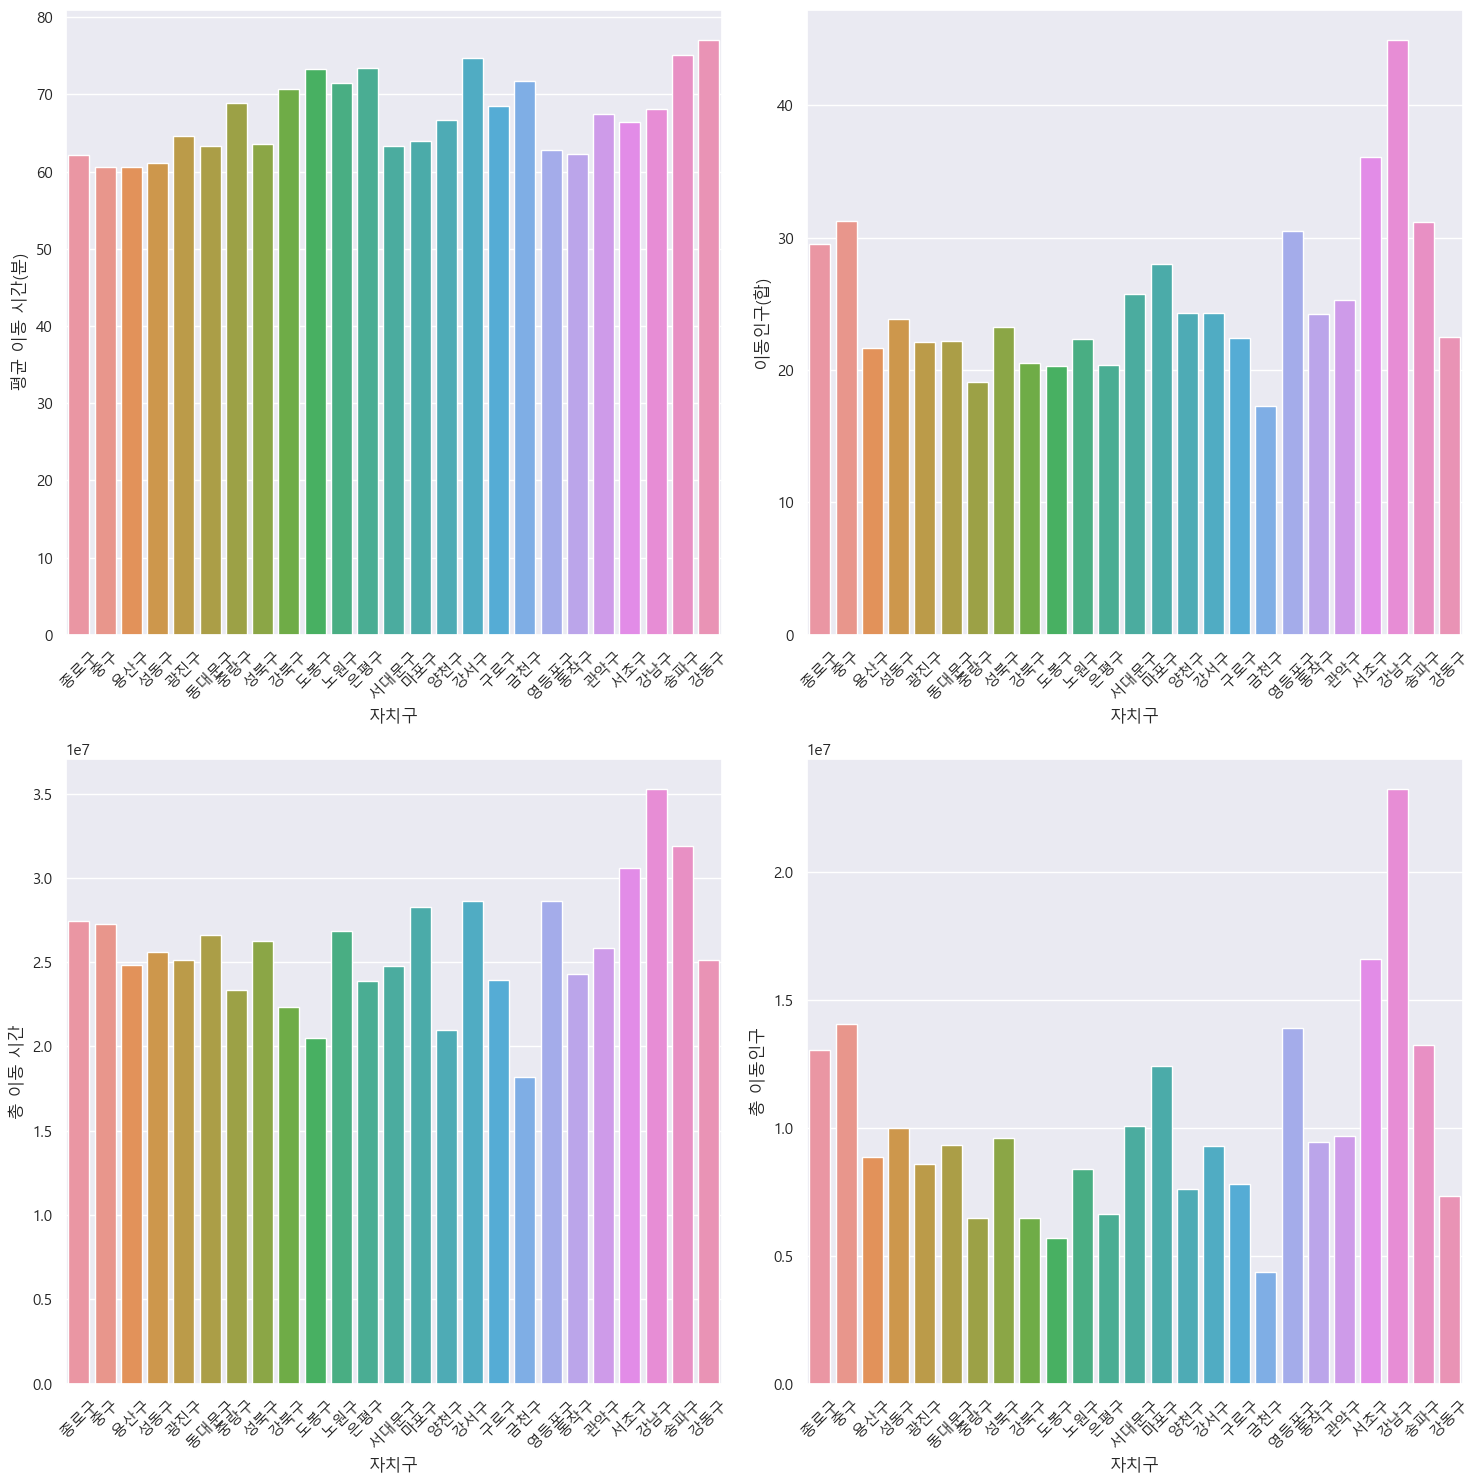

평균 이동 시간(분) 상위 5개 지역: ['강동구', '송파구', '강서구', '은평구', '도봉구']
평균 이동 시간(분) 하위 5개 지역: ['동작구', '종로구', '성동구', '용산구', '중구']
이동인구(합) 상위 5개 지역: ['강남구', '서초구', '중구', '송파구', '영등포구']
이동인구(합) 하위 5개 지역: ['강북구', '은평구', '도봉구', '중랑구', '금천구']
총 이동 시간 상위 5개 지역: ['강남구', '송파구', '서초구', '강서구', '영등포구']
총 이동 시간 하위 5개 지역: ['중랑구', '강북구', '양천구', '도봉구', '금천구']
총 이동인구 상위 5개 지역: ['강남구', '서초구', '중구', '영등포구', '송파구']
총 이동인구 하위 5개 지역: ['은평구', '강북구', '중랑구', '도봉구', '금천구']


In [36]:
feature, targets = '자치구', list(seoul_moving_info)[1:]

eda_cat_num(feature, targets, seoul_moving_diff_info)

### 4. 위 차트를 통해 알게된 사실을 정리해봅시다.

1. **송파구, 강서구, 강남구, 서초구, 영등포구**:  이동시간이 많이 소요되고 이동 인구수도 많아 정류장이 더 필요할 것 같음
2. **도봉구, 강북구, 금천구, 중랑구**: 평균적인 이동 시간에 비해서 나머지 요인들이 너무 적음 → 인구 수가 적은 지역이거나, 인구 수 대비 이동 인구 수가 많을 수 도 있다 → 정류장이 더 필요할 것 같음
3. **종로구, 동작구, 중구, 성동구, 용산구, 동대문구, 양천구**: 평균 이동 시간 및 이동 인구 수가 적어 정류장이 다른 지역에 비해 덜 필요할 수도 있음
4. **강동구, 마포구**: 평균 이동 시간, 인구 수, 총 이동 인구 수가 많아 정류장이 필요할 수 도 있다
5. 평균 이동시간은 대체로 1시간 이상이다

---